# Task
 K-Means clustering, and visualize the results.

Student 1: StudyHours=1, Grade=45, Cluster=1
Student 2: StudyHours=2, Grade=50, Cluster=1
Student 3: StudyHours=2.5, Grade=52, Cluster=1
Student 4: StudyHours=3, Grade=55, Cluster=1
Student 5: StudyHours=3.5, Grade=60, Cluster=1
Student 6: StudyHours=4, Grade=62, Cluster=1
Student 7: StudyHours=5, Grade=70, Cluster=2
Student 8: StudyHours=5.5, Grade=72, Cluster=2
Student 9: StudyHours=6, Grade=75, Cluster=2
Student 10: StudyHours=6.5, Grade=78, Cluster=2
Student 11: StudyHours=7, Grade=80, Cluster=2
Student 12: StudyHours=7.5, Grade=82, Cluster=0
Student 13: StudyHours=8, Grade=85, Cluster=0
Student 14: StudyHours=8.5, Grade=87, Cluster=0
Student 15: StudyHours=9, Grade=90, Cluster=0
Student 16: StudyHours=9.5, Grade=92, Cluster=0
Student 17: StudyHours=10, Grade=95, Cluster=0
Student 18: StudyHours=4.5, Grade=65, Cluster=2
Student 19: StudyHours=2.2, Grade=53, Cluster=1
Student 20: StudyHours=3.8, Grade=58, Cluster=1


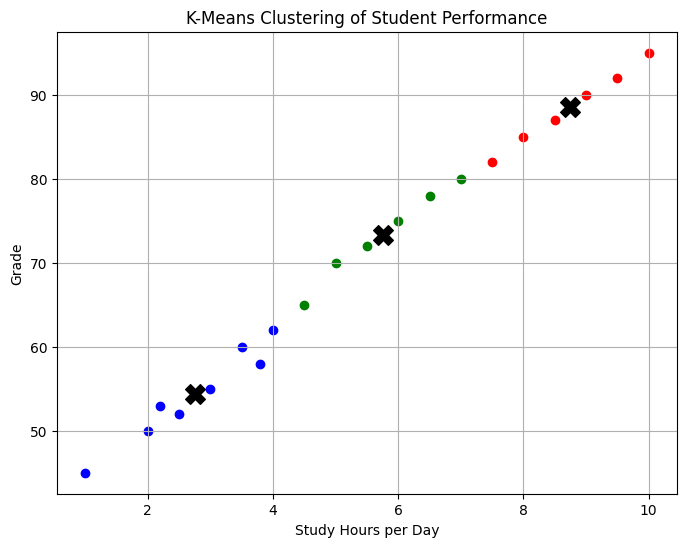

In [ ]:
# Step 1: Create student performance dataset
students = [
    {'StudyHours': 1, 'Grade': 45},
    {'StudyHours': 2, 'Grade': 50},
    {'StudyHours': 2.5, 'Grade': 52},
    {'StudyHours': 3, 'Grade': 55},
    {'StudyHours': 3.5, 'Grade': 60},
    {'StudyHours': 4, 'Grade': 62},
    {'StudyHours': 5, 'Grade': 70},
    {'StudyHours': 5.5, 'Grade': 72},
    {'StudyHours': 6, 'Grade': 75},
    {'StudyHours': 6.5, 'Grade': 78},
    {'StudyHours': 7, 'Grade': 80},
    {'StudyHours': 7.5, 'Grade': 82},
    {'StudyHours': 8, 'Grade': 85},
    {'StudyHours': 8.5, 'Grade': 87},
    {'StudyHours': 9, 'Grade': 90},
    {'StudyHours': 9.5, 'Grade': 92},
    {'StudyHours': 10, 'Grade': 95},
    {'StudyHours': 4.5, 'Grade': 65},
    {'StudyHours': 2.2, 'Grade': 53},
    {'StudyHours': 3.8, 'Grade': 58}
]

# Step 2: Convert to data points for clustering
data_points = []
for student in students:
    data_points.append([student['StudyHours'], student['Grade']])

# Step 3: KMeans Clustering Implementation
import random
import math

# Helper function to calculate Euclidean distance
def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# Initialize K centroids randomly
def initialize_centroids(points, k):
    return random.sample(points, k)

# Assign points to nearest centroid
def assign_clusters(points, centroids):
    clusters = [[] for _ in centroids]
    for point in points:
        dists = [distance(point, centroid) for centroid in centroids]
        min_index = dists.index(min(dists))
        clusters[min_index].append(point)
    return clusters

# Calculate new centroids
def calculate_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:
            x_coords = [point[0] for point in cluster]
            y_coords = [point[1] for point in cluster]
            new_centroids.append([sum(x_coords)/len(x_coords), sum(y_coords)/len(y_coords)])
        else:
            new_centroids.append([0, 0])
    return new_centroids

# Check if centroids have converged
def has_converged(old_centroids, new_centroids, tol=1e-4):
    for oc, nc in zip(old_centroids, new_centroids):
        if distance(oc, nc) > tol:
            return False
    return True

# Full KMeans function
def kmeans(points, k=3, max_iters=5):
    centroids = initialize_centroids(points, k)
    for _ in range(max_iters):
        clusters = assign_clusters(points, centroids)
        new_centroids = calculate_centroids(clusters)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    # Map each point to its cluster index
    labels = []
    for point in points:
        dists = [distance(point, centroid) for centroid in centroids]
        labels.append(dists.index(min(dists)))
    return labels, centroids

# Step 4: Apply KMeans
labels, centroids = kmeans(data_points, k=3)

# Step 5: Print results
for i, student in enumerate(students):
    print(f"Student {i+1}: StudyHours={student['StudyHours']}, Grade={student['Grade']}, Cluster={labels[i]}")

# Optional: Visualization
try:
    import matplotlib.pyplot as plt

    colors = ['red', 'blue', 'green']
    cluster_names = ['Low', 'Average', 'High']

    plt.figure(figsize=(8,6))
    for i in range(len(data_points)):
        x, y = data_points[i]
        plt.scatter(x, y, color=colors[labels[i]], label=f'Cluster {labels[i]}' if i == 0 else "")

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=200)

    plt.title('K-Means Clustering of Student Performance')
    plt.xlabel('Study Hours per Day')
    plt.ylabel('Grade')
    plt.grid(True)
    plt.show()

except ImportError:
    print("\nmatplotlib not installed — skipping plot.\n")
